In [1]:
import re
import pandas as pd
import os
import numpy as np
import json
import plotly.graph_objects as go
from pymongo import MongoClient

import seaborn

In [2]:
# Paths ======================================================================
os.chdir("C:/Users/anama\OneDrive - KU Leuven/Thesis/dat")


In [3]:
client = MongoClient('mongodb://localhost:27017')
database = client['pretoriaa']
collectionDB = database.get_collection("thesis")

In [4]:
df = pd.DataFrame (list(collectionDB.find()))

In [12]:
df

,_id,version,file,year,text,freqWords,nWords
0,637c41facfa3b5ab5f44b14d,0.0.1,A001-92,1992,auto -001 de febrero 27 de 1992 demanda de inc...,"{'de': 62, 'la': 36, 'que': 24, 'el': 22, 'en'...",948
1,637c41facfa3b5ab5f44b14e,0.0.1,A002-92,1992,auto -002 de marzo 2 de 1992 demanda de incon...,"{'de': 112, 'la': 64, 'el': 35, 'y': 33, 'en':...",1151
2,637c41facfa3b5ab5f44b14f,0.0.1,A003-92,1992,auto -003 de marzo 3 de 1992 demanda de incon...,"{'de': 415, 'la': 326, 'el': 169, 'en': 162, '...",5698
3,637c41facfa3b5ab5f44b150,0.0.1,A004-92,1992,auto -004 de marzo 4 de 1992 constitucion poli...,"{'de': 104, 'la': 48, 'el': 47, 'del': 29, 'en...",1092
4,637c41facfa3b5ab5f44b151,0.0.1,A005-92,1992,auto -005 de marzo 9 de 1992 demanda de incon...,"{'de': 36, 'la': 15, 'y': 9, 'el': 8, 'en': 7,...",290
...,...,...,...,...,...,...,...
38528,637c44f8cfa3b5ab5f4547cd,0.0.1,T-312-22,2022,sentencia t-312/22 referencia: expediente t-8....,"{'de': 914, 'la': 511, 'el': 292, 'en': 265, '...",10303
38529,637c44f8cfa3b5ab5f4547ce,0.0.1,T-314-22,2022,sentencia t-314/22 expediente: t-8.557.552 (ac...,"{'de': 2078, 'la': 948, 'el': 562, 'que': 547,...",19876
38530,637c44f8cfa3b5ab5f4547cf,0.0.1,T-315-22,2022,sentencia t-315/22 referencia: expediente t-8....,"{'de': 1294, 'la': 733, 'el': 331, 'que': 298,...",11753
38531,637c44f8cfa3b5ab5f4547d0,0.0.1,T-318-22,2022,sentencia t-318/22 referencia: expediente t-8....,"{'de': 1042, 'la': 517, 'que': 357, 'el': 348,...",11456


In [24]:
def typeDoc(x):
    a = re.findall('\D+', x)[0]
    a = re.findall('\w+', a)[0]
    a = a.upper()
    return a

In [25]:
df['type'] = df['file'].apply(typeDoc)

In [67]:
print(df['type'].value_counts())

T         19847
A         11137
C          7045
SU          499
ACU           3
E             1
THUMBS        1
Name: type, dtype: int64


In [68]:
df.reset_index().groupby(['type', 'year']).count()

index  _id  version  file  text  freqWords  nWords
type   year                                                    
A      1992     24   24       24    24    24         24      24
       1993     15   15       15    15    15         15      15
       1994     33   33       33    33    33         33      33
       1995     64   64       64    64    64         64      64
       1996     72   72       72    72    72         72      72
...            ...  ...      ...   ...   ...        ...     ...
T      2019    364  364      364   364   364        364     364
       2020    275  275      275   275   275        275     275
       2021    255  255      255   255   255        255     255
       2022    188  188      188   188   188        188     188
THUMBS 1997      1    1        1     1     1          1       1

[127 rows x 7 columns]

# Number of documents by year

Text(0.5, 1.0, 'Number of documents published per year')

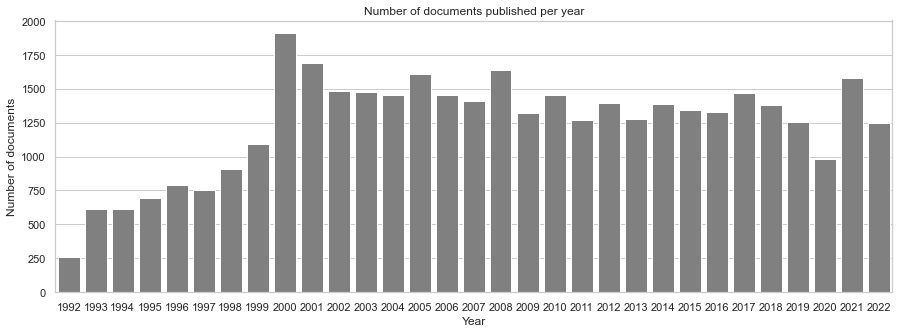

In [60]:

seaborn.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15, 5))
ax = seaborn.countplot(x="year", data=df, color = "gray")
plt.xlabel("Year")
plt.ylabel("Number of documents")
plt.title("Number of documents published per year")

# Document extension distribution

In [31]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df['year'][ df['type'] == 'C' ],
                        y=df['nWords'][ df['type'] == 'C' ],
                        legendgroup='C', scalegroup='C', name='C',
                        side='negative',
                        line_color='blue',
                        )
             )

fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

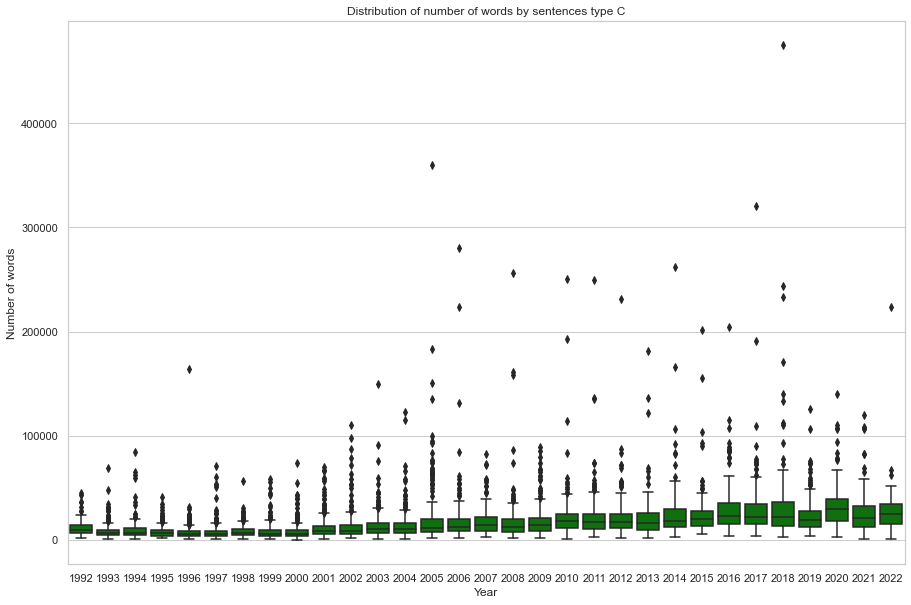

In [62]:

import seaborn
import matplotlib.pyplot as plt
seaborn.set(style='whitegrid')
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x = df['year'][ df['type'] == 'C' ], 
                y = df['nWords'][ df['type'] == 'C' ], 
                data = df,
                color = "green")
plt.xlabel("Year")
plt.ylabel("Number of words")
plt.title("Distribution of number of words by sentences type C")
plt.show()

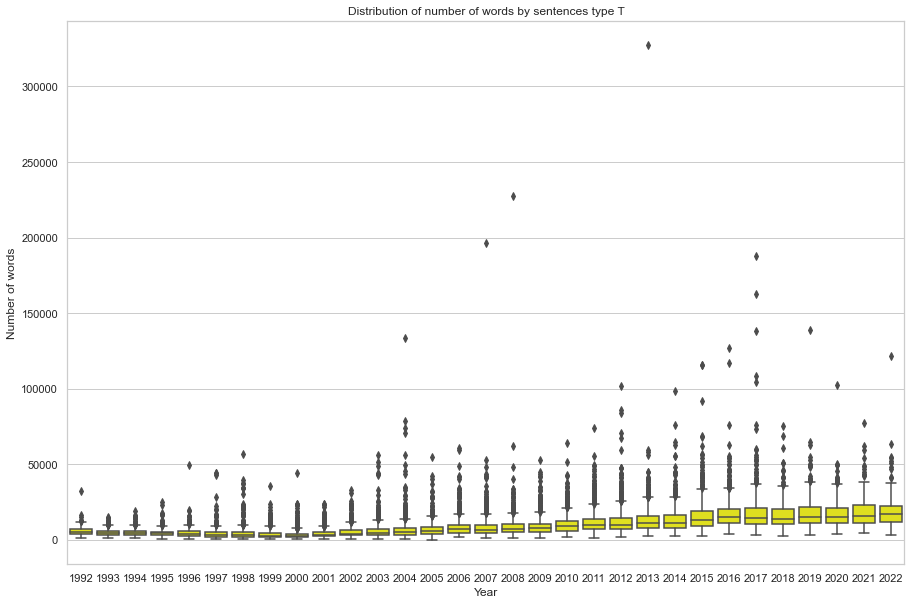

In [63]:
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x = df['year'][ df['type'] == 'T' ], 
                y = df['nWords'][ df['type'] == 'T' ], 
                data = df,
                color = "yellow")
plt.xlabel("Year")
plt.ylabel("Number of words")
plt.title("Distribution of number of words by sentences type T")
plt.show()
plt.show()

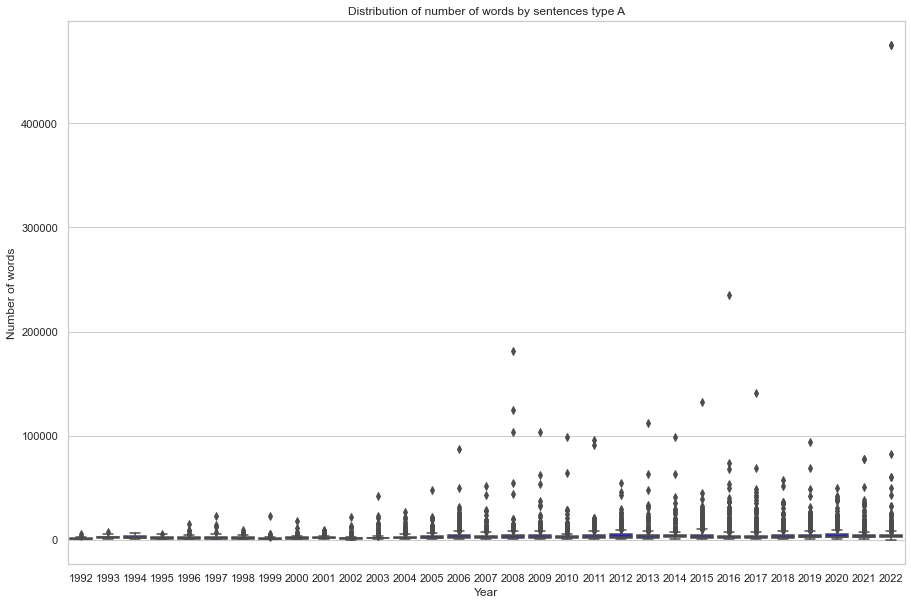

In [64]:
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x = df['year'][ df['type'] == 'A' ], 
                y = df['nWords'][ df['type'] == 'A' ], 
                data = df,
                color = "blue")
plt.xlabel("Year")
plt.ylabel("Number of words")
plt.title("Distribution of number of words by sentences type A")
plt.show()
plt.show()

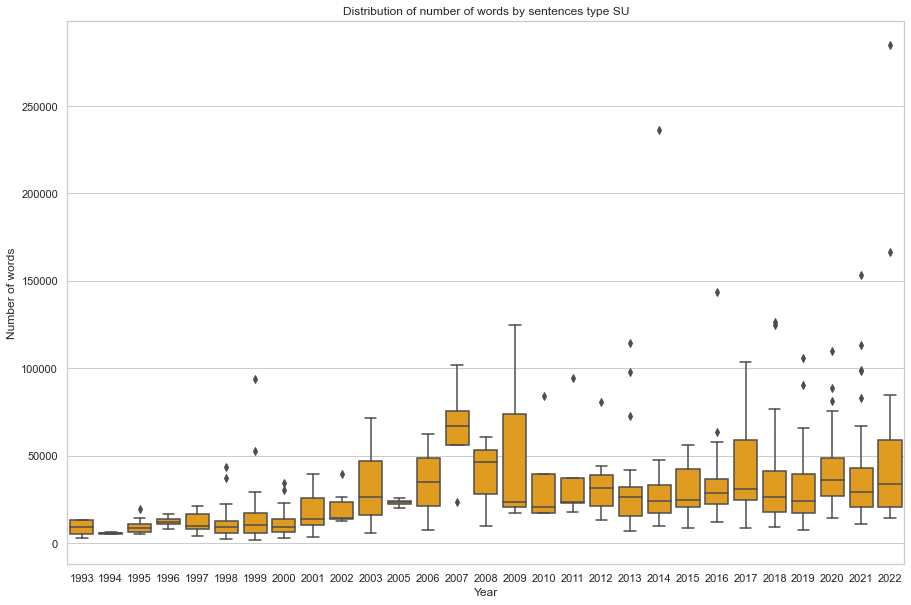

In [65]:
fig, ax = plt.subplots(figsize=(15, 10))
seaborn.boxplot(x = df['year'][ df['type'] == 'SU' ], 
                y = df['nWords'][ df['type'] == 'SU' ], 
                data = df,
                color = "orange")
plt.xlabel("Year")
plt.ylabel("Number of words")
plt.title("Distribution of number of words by sentences type SU")
plt.show()

# Most frequent words

In [71]:
from pymongo import MongoClient
os.chdir("C:/Users/anama\OneDrive - KU Leuven/Thesis/dat")
years = os.listdir()
client = MongoClient('mongodb://localhost:27017')
database = client['pretoriaa']
collectionDB = database.get_collection("thesisData")

df1 = pd.DataFrame()

for iYear in years:
    files = os.listdir(os.getcwd() + '/' + iYear) 
    print(iYear)
    for iFile in files:
        iFile1 = os.getcwd() + '/'+ iYear +  '/' + iFile
        f = open(iFile1, "r", encoding='utf-8')
        data = f.read()
        data1 = data.replace('\n', ' ')
        data1 = data1.replace('\t', ' ')
        data1 = re.sub(' +', ' ', data1)
        data1 = data1.lower()
        frequency = pd.Series(re.findall(r'\w+', data1)).value_counts().to_frame()
        df1 = pd.concat([df1, frequency])
        

1992
1993
1994
1995
1996
1997
1998
1999
2000


C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



2001
2002


C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning

2003
2004
2005


C:\Users\anama\AppData\Local\Temp\ipykernel_32992\509294023.py:21: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [83]:
df1.index.name = 'gram'
df1.reset_index(inplace=True)
df1

,gram,0
0,de,62
1,la,36
2,que,24
3,el,22
4,en,21
...,...,...
57265640,tan,1
57265641,advierte,1
57265642,demanda,1
57265643,verifica,1


In [84]:
df1.columns = ['gram', 'n']

In [85]:
df1


,gram,n
0,de,62
1,la,36
2,que,24
3,el,22
4,en,21
...,...,...
57265640,tan,1
57265641,advierte,1
57265642,demanda,1
57265643,verifica,1


In [86]:
countWords = df1.groupby(['gram'])['n'].sum().reset_index()

In [87]:
countWords

,gram,n
0,0,19652
1,00,30425
2,000,62060
3,0000,164
4,00000,22
...,...,...
388708,𝑃𝐸𝑇,1
388709,𝑃𝑎𝑟𝑡𝑖𝑐𝑖𝑝𝑎𝑐𝑖ó𝑛,1
388710,𝑇𝑎𝑠𝑎,2
388711,𝑑𝑒,2
